In [1]:
pip install jedi

Note: you may need to restart the kernel to use updated packages.


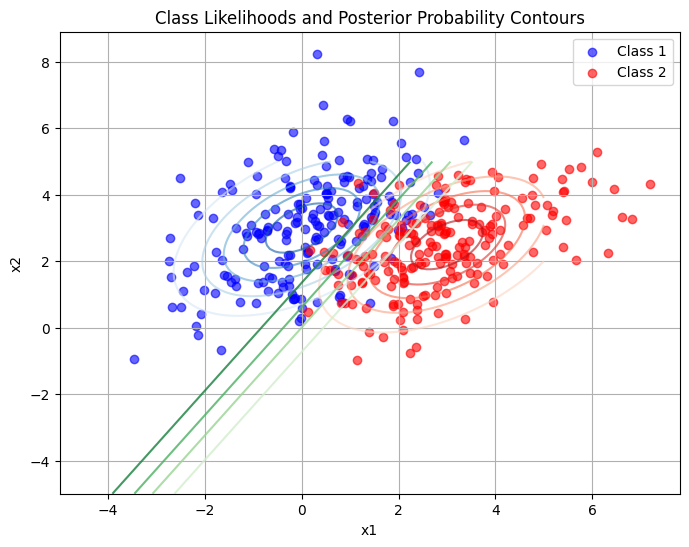

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
#means
m1=np.array([0,3])
m2=np.array([3,2.5])
#
c1=np.array([[2,1],[1,2]])
c2=np.array([[2,1],[1,2]])
#
p1=0.5
p2=0.5
#
np.random.seed(30)
data_example=200
#Generate random samples that conform to a multivariate normal distribution
data1=np.random.multivariate_normal(m1, c1, data_example)
data2= np.random.multivariate_normal(m2, c2,data_example)
#
def Probabilities_plot(m1, c1, m2, c2, p1, p2):
    # creat grid
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(x, y)
    #
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    rv1 = multivariate_normal(m1, c1)
    rv2 = multivariate_normal(m2, c2)
    #Posterior probability
    Z1 = rv1.pdf(pos) * p1
    Z2 = rv2.pdf(pos) * p2
    Z_post = Z1 / (Z1 + Z2)

    # 绘制等高线
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z1, levels=5, cmap='Blues', alpha=0.6)
    plt.contour(X, Y, Z2, levels=5, cmap='Reds', alpha=0.6)
    #
    plt.contour(X, Y, Z_post, levels=5, cmap='Greens', alpha=0.8)

    # 绘制数据点
    plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Class 1', alpha=0.6)
    plt.scatter(data2[:, 0], data2[:, 1], color='red', label='Class 2', alpha=0.6)
    
    plt.legend()
    plt.title("Class Likelihoods and Posterior Probability Contours")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()
# 调用函数绘制等高线和后验概率
Probabilities_plot(m1, c1, m2, c2, p1, p2)
    
    

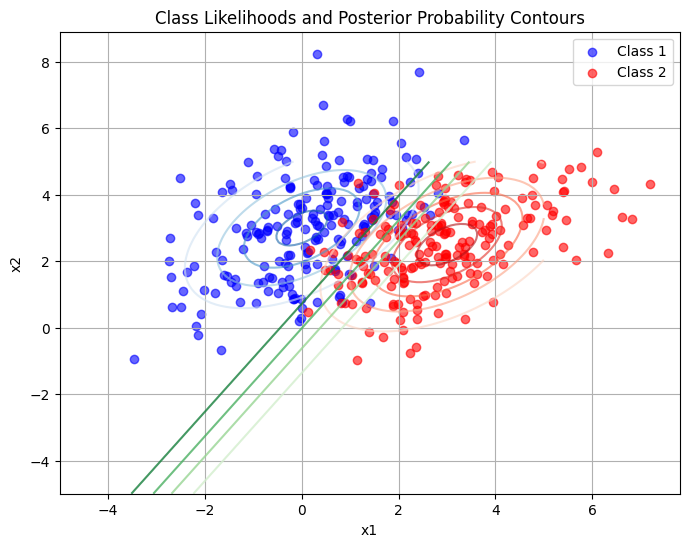

In [14]:
p3=0.7
p4=0.3
Probabilities_plot(m1, c1, m2, c2, p3, p4)

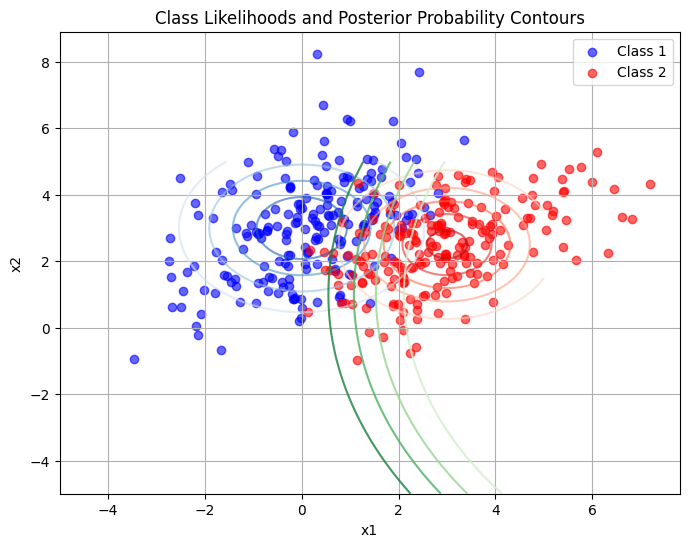

In [16]:
c3=([[2,0],[0,2]])
c4=([[1.5,0],[0,1.5]])
Probabilities_plot(m1, c3, m2, c4, p1, p2)

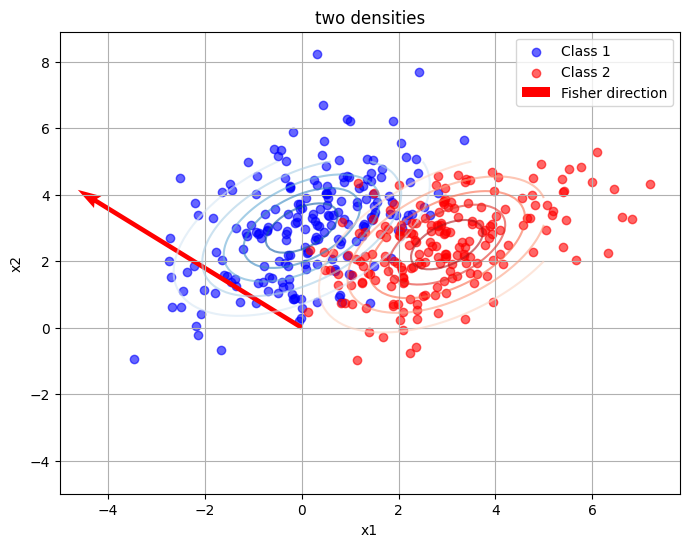

In [4]:
def Probabilities_plot2(m1,c1,m2,c2):
    x=np.linspace(-5,5,100)
    y=np.linspace(-5,5,100)
    #
    X,Y=np.meshgrid(x,y)
    #
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    rv1 = multivariate_normal(m1, c1)
    rv2 = multivariate_normal(m2, c2)
    # 
    z1=rv1.pdf(pos)*p1
    z2=rv2.pdf(pos)*p2
    #
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, z1, levels=5, cmap='Blues', alpha=0.6)
    plt.contour(X, Y, z2, levels=5, cmap='Reds', alpha=0.6)
    #
    plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Class 1', alpha=0.6)
    plt.scatter(data2[:, 0], data2[:, 1], color='red', label='Class 2', alpha=0.6)
    plt.quiver(0, 0, w_F[0], w_F[1], scale=3, color='r', label='Fisher direction')
    plt.legend()
    plt.title("two densities")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()
Probabilities_plot2(m1,c1,m2,c2)    

Fisher linear discriminant direction w_F: [-1.08333333  0.66666667]


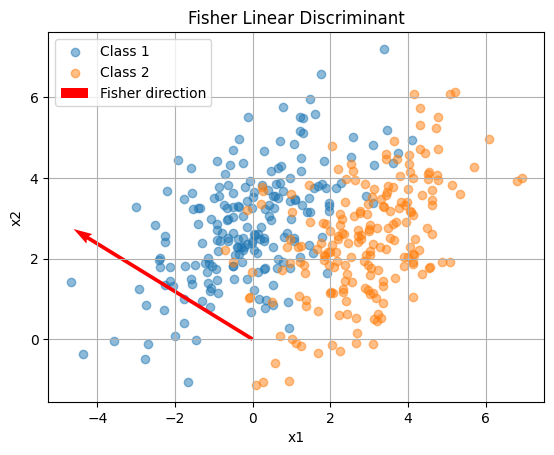

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义均值和协方差矩阵
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])

# 计算 Fisher 线性判别方向
C_inv = np.linalg.inv(C1 + C2)  # 协方差矩阵的逆
w_F = np.dot(C_inv, m1 - m2)    # Fisher 线性判别方向

# 打印 Fisher 判别方向
print("Fisher linear discriminant direction w_F:", w_F)

# 生成数据样本
num_samples = 200
data_class1 = np.random.multivariate_normal(m1, C1, num_samples)
data_class2 = np.random.multivariate_normal(m2, C2, num_samples)

# 绘制类1和类2的数据分布
plt.scatter(data_class1[:, 0], data_class1[:, 1], label='Class 1', alpha=0.5)
plt.scatter(data_class2[:, 0], data_class2[:, 1], label='Class 2', alpha=0.5)

# Fisher 判别方向的绘制
plt.quiver(0, 0, w_F[0], w_F[1], scale=3, color='r', label='Fisher direction')

plt.title('Fisher Linear Discriminant')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

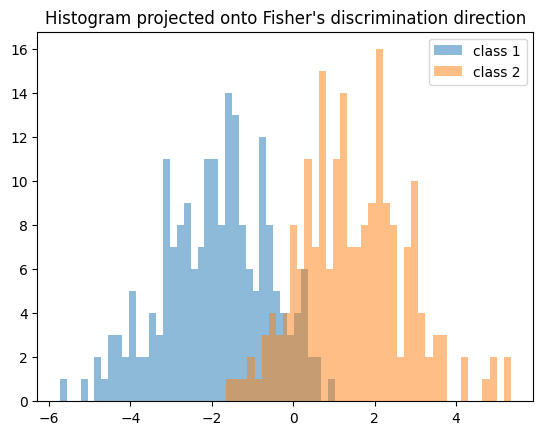

In [4]:
Ci = np.linalg.inv(2*C1)#求方阵的逆矩阵的函数
wf=Ci@(m2-m1)
#
yp1 = data1 @ wf
yp2 = data2 @ wf
plt.hist(yp1, bins=40, alpha=0.5, label='class 1')
plt.hist(yp2, bins=40, alpha=0.5, label='class 2')
plt.title("Histogram projected onto Fisher's discrimination direction")
plt.legend()
plt.show()

-5.728642511555238 5.350746724860028


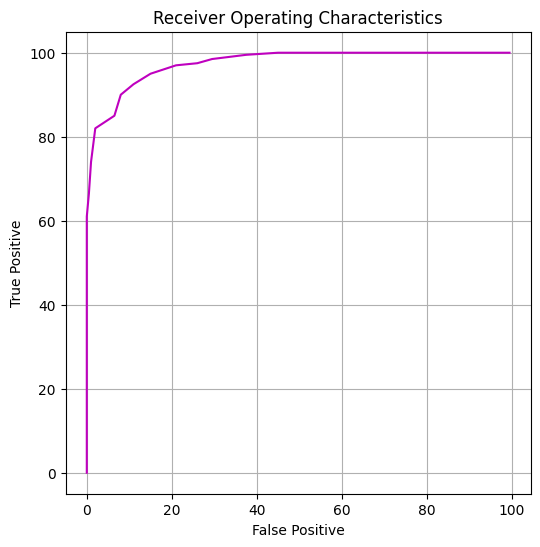

In [5]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
    FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
    ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c="m")
ax.set_xlabel("False Positive")
ax.set_ylabel("True Positive")
ax.set_title("Receiver Operating Characteristics")
ax.grid(True)
plt.savefig("rocCurve.png")


In [6]:
area=np.trapezoid(ROC[::-1,0]/100,ROC[::-1,1]/100)
print(f'the area under ROC:{area}')

the area under ROC:0.9696125


In [8]:
threshold = 0  # Choose a decision 
TP = len(yp2[yp2 > threshold])
TN = len(yp1[yp1 <= threshold])
accuracy = (TP + TN) / (len(yp1) + len(yp2)) * 100
print(f'threshold at {threshold} Classification accuracy: {accuracy:.2f}%')

threshold at 0 Classification accuracy: 90.25%


the area under mean ROC:0.9629000000000001
the area under random ROC:0.8509749999999999


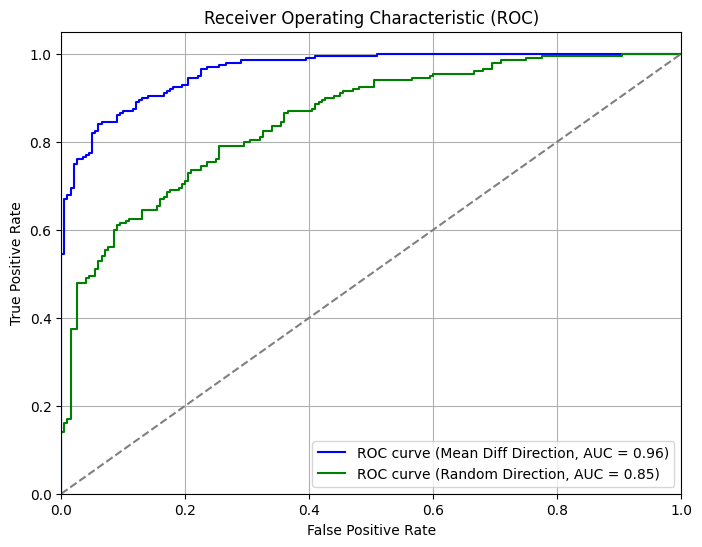

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the parameters of the two Gaussian distributions
mean1 = np.array([0, 3])
mean2 = np.array([3, 2.5])
cov1 = cov2 = np.array([[2, 1], [1, 2]])

# Generate 200 samples from each class
np.random.seed(0)
class1_samples = np.random.multivariate_normal(mean1, cov1, 200)
class2_samples = np.random.multivariate_normal(mean2, cov2, 200)

# Project data onto the direction connecting the means of the two classes
mean_diff = mean2 - mean1
mean_diff_direction = mean_diff / np.linalg.norm(mean_diff)

projections_mean_diff_class1 = class1_samples @ mean_diff_direction
projections_mean_diff_class2 = class2_samples @ mean_diff_direction

# Create labels for the two classes (0 and 1)
labels_class1 = np.zeros(len(projections_mean_diff_class1))
labels_class2 = np.ones(len(projections_mean_diff_class2))

# Combine the projections and labels for both classes 将两个类的投影和标签结合起来
projections_mean_diff = np.concatenate([projections_mean_diff_class1, projections_mean_diff_class2])
labels = np.concatenate([labels_class1, labels_class2])

# Compute ROC curve for direction connecting means
fpr_mean_diff, tpr_mean_diff, _ = roc_curve(labels, projections_mean_diff)
roc_auc_mean_diff = auc(fpr_mean_diff, tpr_mean_diff)
print(f'the area under mean ROC:{roc_auc_mean_diff}')
# Now for a random direction
random_direction = np.random.randn(2)
random_direction /= np.linalg.norm(random_direction)

projections_random_class1 = class1_samples @ random_direction
projections_random_class2 = class2_samples @ random_direction

projections_random = np.concatenate([projections_random_class1, projections_random_class2])

# Compute ROC curve for random direction
fpr_random, tpr_random, _ = roc_curve(labels, projections_random)
roc_auc_random = auc(fpr_random, tpr_random)
print(f'the area under random ROC:{roc_auc_random}')
# Plot both ROC curves on the same plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_mean_diff, tpr_mean_diff, color='blue', label=f'ROC curve (Mean Diff Direction, AUC = {roc_auc_mean_diff:.2f})')
plt.plot(fpr_random, tpr_random, color='green', label=f'ROC curve (Random Direction, AUC = {roc_auc_random:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

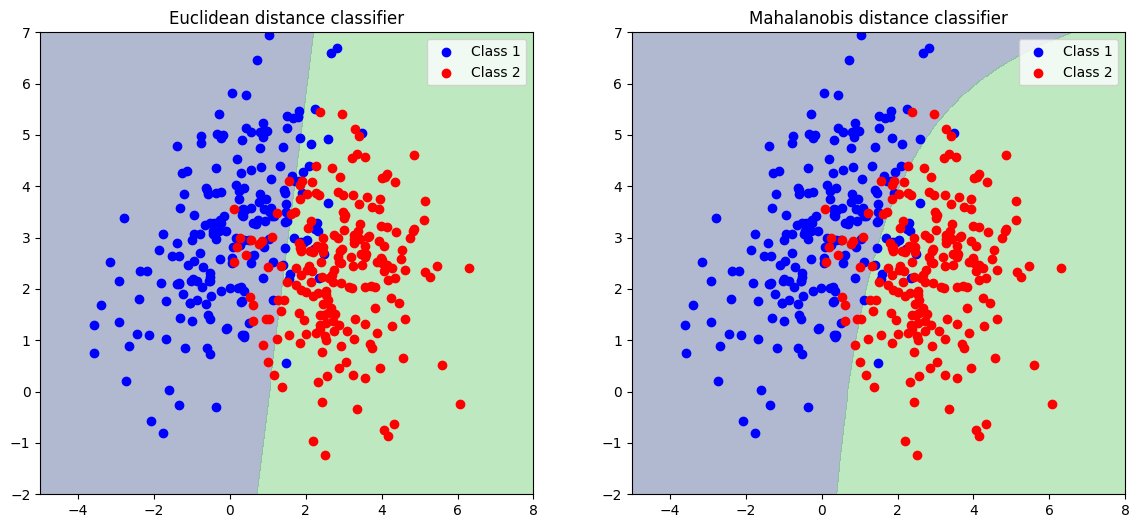

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# 生成两类高斯分布的数据
np.random.seed(0)
mean1 = [0, 3]
mean2 = [3, 2.5]
cov1 = [[2, 1], [1, 2]]
cov2 = [[1.5, 0], [0, 1.5]]

class1_samples = np.random.multivariate_normal(mean1, cov1, 200)
class2_samples = np.random.multivariate_normal(mean2, cov2, 200)

# 定义网格用于绘制分类边界
x_min, x_max = -5, 8
y_min, y_max = -2, 7
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]#数组维度拉成一维数组

# euclidean_classifie
def euclidean_classifier(grid, mean1, mean2):
    dist_to_mean1 = cdist(grid, [mean1], metric='euclidean')
    dist_to_mean2 = cdist(grid, [mean2], metric='euclidean')
    return np.where(dist_to_mean1 < dist_to_mean2, 0, 1)

# Mahalanobis distance classifier
def mahalanobis_classifier(grid, mean1, cov1, mean2, cov2):
    inv_cov1 = np.linalg.inv(cov1)
    inv_cov2 = np.linalg.inv(cov2)
    dist_to_mean1 = cdist(grid, [mean1], metric='mahalanobis', VI=inv_cov1)
    dist_to_mean2 = cdist(grid, [mean2], metric='mahalanobis', VI=inv_cov2)
    return np.where(dist_to_mean1 < dist_to_mean2, 0, 1)

# use euclidean classifier
euclidean_labels = euclidean_classifier(grid, mean1, mean2)

# use Mahalanobis distance classifier
mahalanobis_labels = mahalanobis_classifier(grid, mean1, cov1, mean2, cov2)

# 
plt.figure(figsize=(14, 6))

# euclidean_classifie
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, euclidean_labels.reshape(xx.shape), alpha=0.4, levels=1)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], c='blue', label='Class 1')
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], c='red', label='Class 2')
plt.title('Euclidean distance classifier')
plt.legend()

# Mahalanobis distance classifier
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, mahalanobis_labels.reshape(xx.shape), alpha=0.4, levels=1)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], c='blue', label='Class 1')
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], c='red', label='Class 2')
plt.title('Mahalanobis distance classifier')
plt.legend()

plt.show()